# Data Profiling¶


In [1]:
#Loading all the modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from data_preparation import *

In [2]:
#Read the data, the file doesnt have header so we will assign the column names
df = pd.read_csv('./data/shuffled-full-set-hashed.csv',header=None,names=['type','text'])

In [3]:
df.head(10)

,type,text
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...
5,POLICY CHANGE,10e45001c2f2 6a01047db3ab 6a8e3499dab9 97b6014...
6,POLICY CHANGE,4e5019f629a9 54fb196d55ce 0cf4049f1c7c ef4ea27...
7,BILL,ad4440ac97a5 8e93a2273a93 c913f5129fe2 bfb030c...
8,CANCELLATION NOTICE,25c57acdf805 b7a0f56f6ce8 cf4fc632eed2 67f9c02...
9,BILL,48d657cd9861 fee60001e67a 4ce4bfb42e22 de9738e...


In [4]:
#Check the data
df.describe()

,type,text
count,62204,62159
unique,14,60176
top,BILL,bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq,18968,11


# Basic Data Cleaning

In [5]:
#Look for Missing values
df.isna().sum()

type     0
text    45
dtype: int64

In [6]:
# Only 45 rows out of 62204 rows have text null
# We can easily drop these rows
df.dropna(inplace=True)

In [7]:
df.describe()

,type,text
count,62159,62159
unique,14,60176
top,BILL,bf064c332aa1 079935e500e5 1a4dd36c6de0 7efa289...
freq,18959,11


In [8]:
#Lets Look if there are any duplicates in the data
sum(df.duplicated())

1617

In [9]:
# There are 1617 duplicate rows in the data, they are not adding any value, lets drop it
df = df.drop_duplicates()

In [10]:
df.describe()

,type,text
count,60542,60542
unique,14,60176
top,BILL,84884d80641d
freq,18449,3


# Data Distribution

In [11]:
# Lets look at the document category and count
df.type.value_counts()

BILL                       18449
POLICY CHANGE              10229
CANCELLATION NOTICE         9571
BINDER                      8590
DELETION OF INTEREST        4779
REINSTATEMENT NOTICE        4295
DECLARATION                  966
CHANGE ENDORSEMENT           866
RETURNED CHECK               730
EXPIRATION NOTICE            719
NON-RENEWAL NOTICE           618
BILL BINDER                  277
INTENT TO CANCEL NOTICE      227
APPLICATION                  226
Name: type, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

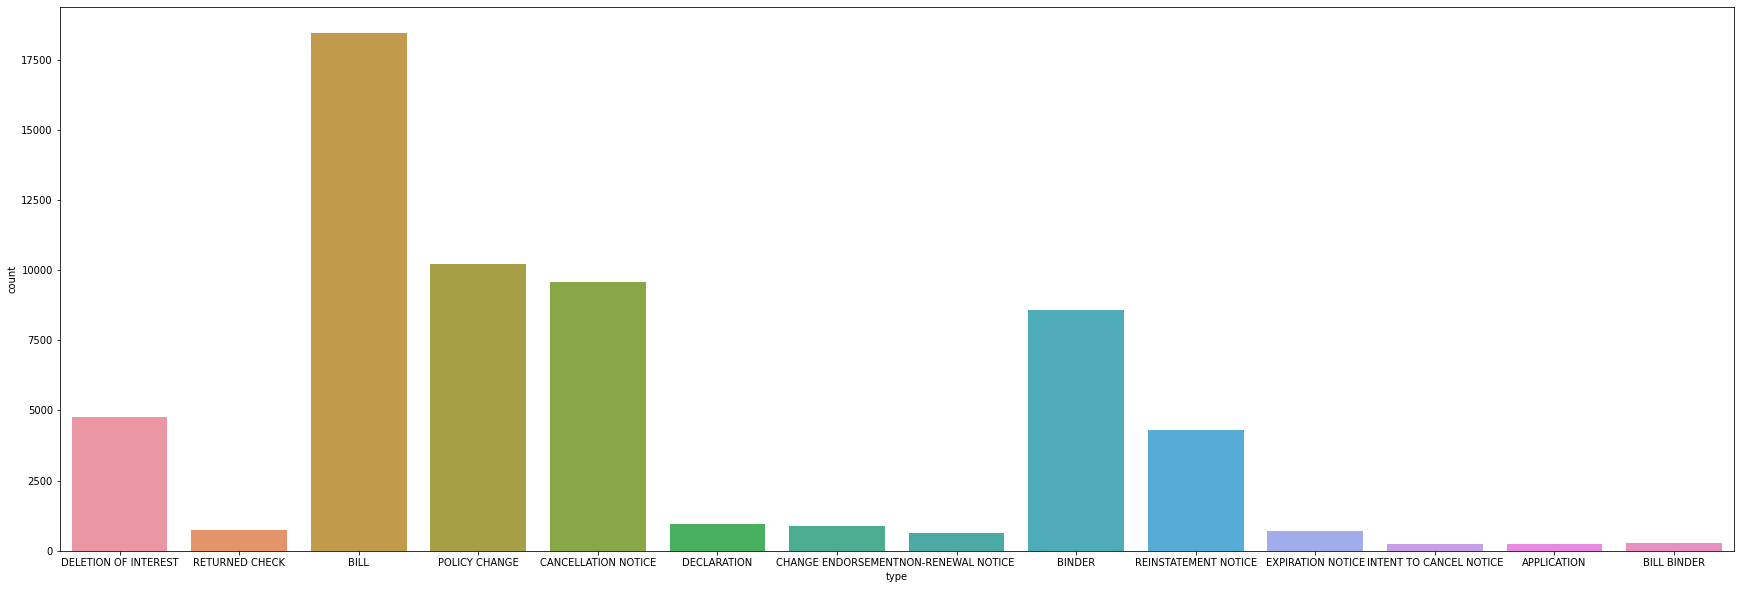

In [12]:
plt.figure(figsize=[30,10])
sns.countplot(x=df.type)

There seems to be lot of imbalance between the different categories, we might need to resort to either downsampling the majority class or upsampling the minority class

# Lexical Analysis
Lets analyze the vocabulary richness of our data. 
If we just analyze the lexical richness of the text_description data, 
it will still give us much idea about how rich our data is in terms of unique vocabulary words:

In [13]:
#Lets See how many unique words we have in our dataset
all_words = [w.split() for w in df.text.values]
total_flat_words = [ewords for words in all_words for ewords in words]

print('total unique words in the dataset: ',len(set(total_flat_words)))
print('total words in the dataset: ',len(total_flat_words))

total unique words in the dataset:  1037934
total words in the dataset:  20250777


In [14]:
#Lets look at distribution of words in document across various document types
#Genrate a new feature which is the total len of document
df['word_count'] = df['text'].str.split().str.len()

In [15]:
df.head()

,type,text,word_count
0,DELETION OF INTEREST,e04a09c87692 d6b72e591b91 5d066f0246f1 ed41171...,465
1,RETURNED CHECK,a3b334c6eefd be95012ebf2b 41d67080e078 ff1c26e...,403
2,BILL,586242498a88 9ccf259ca087 54709b24b45f 6bf9c0c...,185
3,BILL,cd50e861f48b 6ca2dd348663 d38820625542 f077614...,337
4,BILL,9db5536263d8 1c303d15eb65 3f89b4673455 b73e657...,546


In [16]:
#Check the grouping by the doc type
df.groupby('type').word_count.agg(['count','min','mean','median','max','std','sum'])

,count,min,mean,median,max,std,sum
type,,,,,,,
APPLICATION,226,34,884.026549,766.5,3465,661.126257,199790
BILL,18449,1,395.256545,330.0,7030,249.893216,7292088
BILL BINDER,277,5,418.606498,317.0,3360,371.339565,115954
BINDER,8590,1,483.029453,358.0,7426,439.725545,4149223
CANCELLATION NOTICE,9571,7,231.965312,179.0,4107,171.399429,2220140
CHANGE ENDORSEMENT,866,10,163.112009,111.0,4833,215.160368,141255
DECLARATION,966,4,516.761905,404.5,4734,426.754326,499192
DELETION OF INTEREST,4779,66,135.516008,104.0,1941,95.745271,647631
EXPIRATION NOTICE,719,70,302.303199,203.0,1798,270.202116,217356


<AxesSubplot:xlabel='type'>

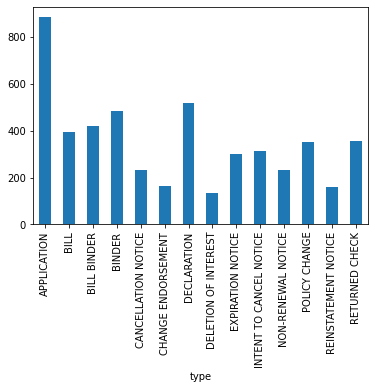

In [17]:
# Plotting the mean number of words per document type
df.groupby('type').word_count.mean().plot(kind='bar')

We would need to investigate the documents where we have less than 10 words
with some of them having only 1 word, which seems quite sketchy and might be bad data from
OCR since both mean and median seems to be very high for the doc type

In [18]:
df[df['word_count'] <= 10].groupby('type').size().sort_values()

type
BILL BINDER                 1
CANCELLATION NOTICE         1
CHANGE ENDORSEMENT          1
INTENT TO CANCEL NOTICE     1
REINSTATEMENT NOTICE        1
DECLARATION                 2
BILL                       14
BINDER                     28
POLICY CHANGE              57
dtype: int64

In [19]:
#We should go ahead and drop there records
df = df[df['word_count'] > 10]

<AxesSubplot:xlabel='type', ylabel='word_count'>

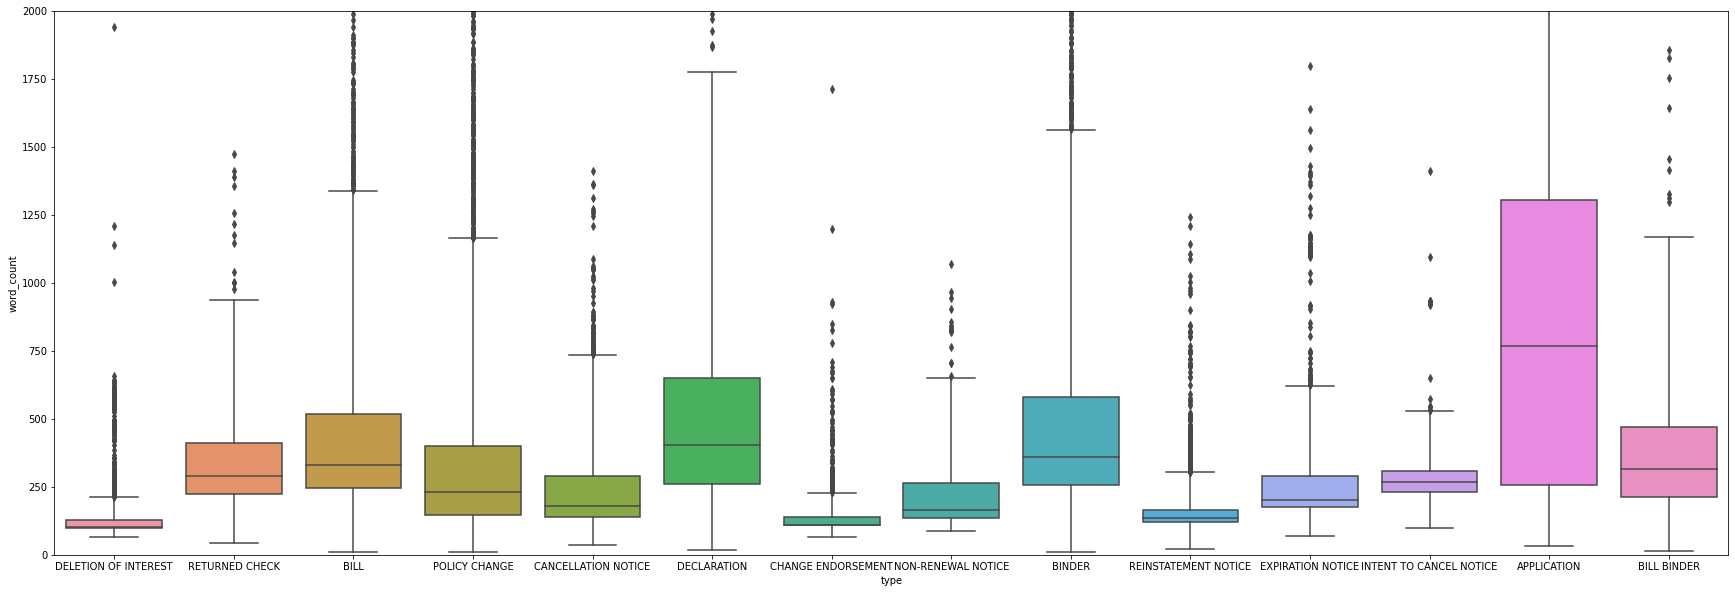

In [20]:
#Lets look at the word count distribution
plt.figure(figsize=[30,10])
plt.ylim(0, 2000)
sns.boxplot(x='type',y='word_count',data=df,whis=3)

There seems to be lot of outliers, lets drop the outliers

In [21]:
#Drop the outliers
df = df[~((df['type']=='POLICY CHANGE') & (df['word_count']>1100))]
df = df[~((df['type']=='BILL') & (df['word_count']>1300))]
df = df[~((df['type']=='BINDER') & (df['word_count']>1400))]
df = df[~((df['type']=='CANCELLATION NOTICE') & (df['word_count']>750))]
df = df[~((df['type']=='REINSTATEMENT NOTICE') & (df['word_count']>250))]
df = df[~((df['type']=='DELETION OF INTEREST') & (df['word_count']>250))]
df = df[~((df['type']=='DECLARATION') & (df['word_count']>1750))]
df = df[~((df['type']=='EXPIRATION NOTICE') & (df['word_count']>600))]
df = df[~((df['type']=='BILL BINDER') & (df['word_count']>1100))]
df = df[~((df['type']=='CHANGE ENDORSEMENT') & (df['word_count']>200))]

<AxesSubplot:xlabel='type', ylabel='word_count'>

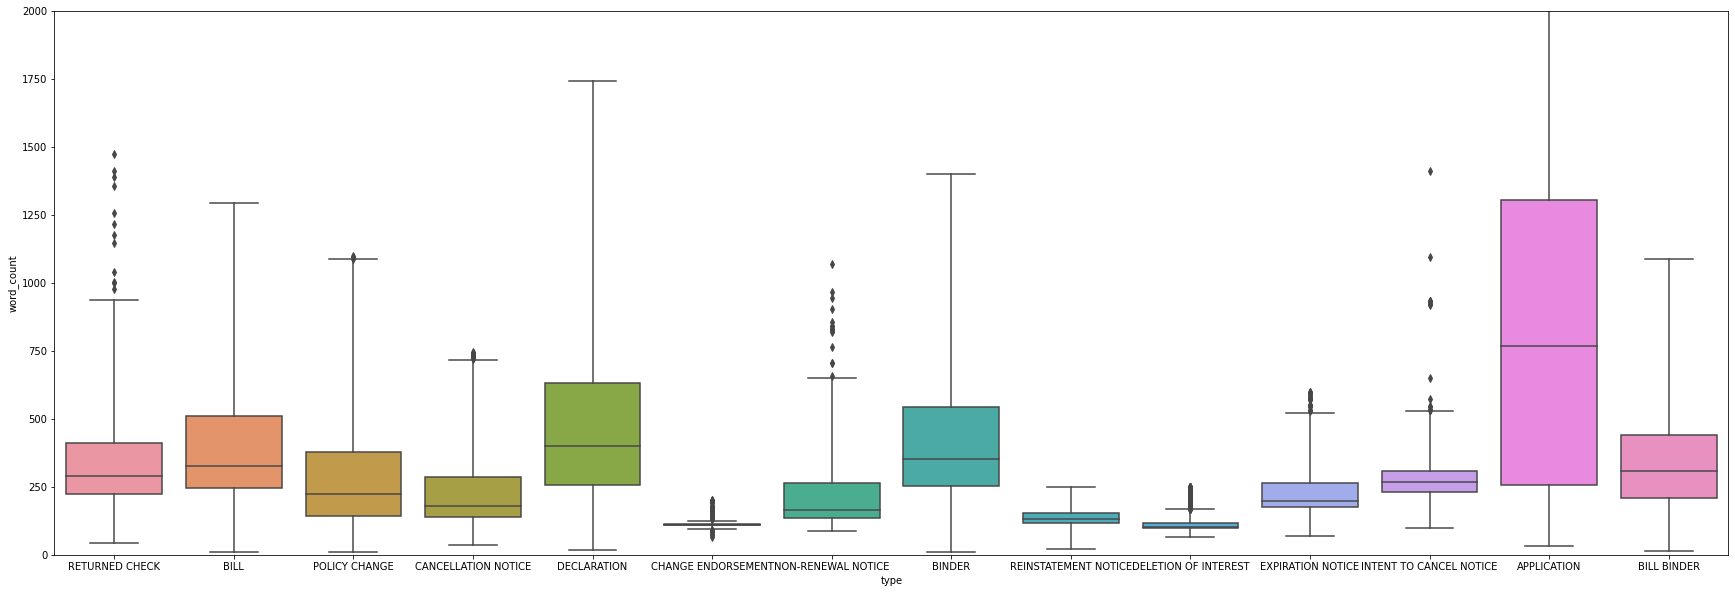

In [22]:
#Lets do the box plot again
plt.figure(figsize=[30,10])
plt.ylim(0, 2000)
sns.boxplot(x='type',y='word_count',data=df,whis=3)

<AxesSubplot:xlabel='type', ylabel='count'>

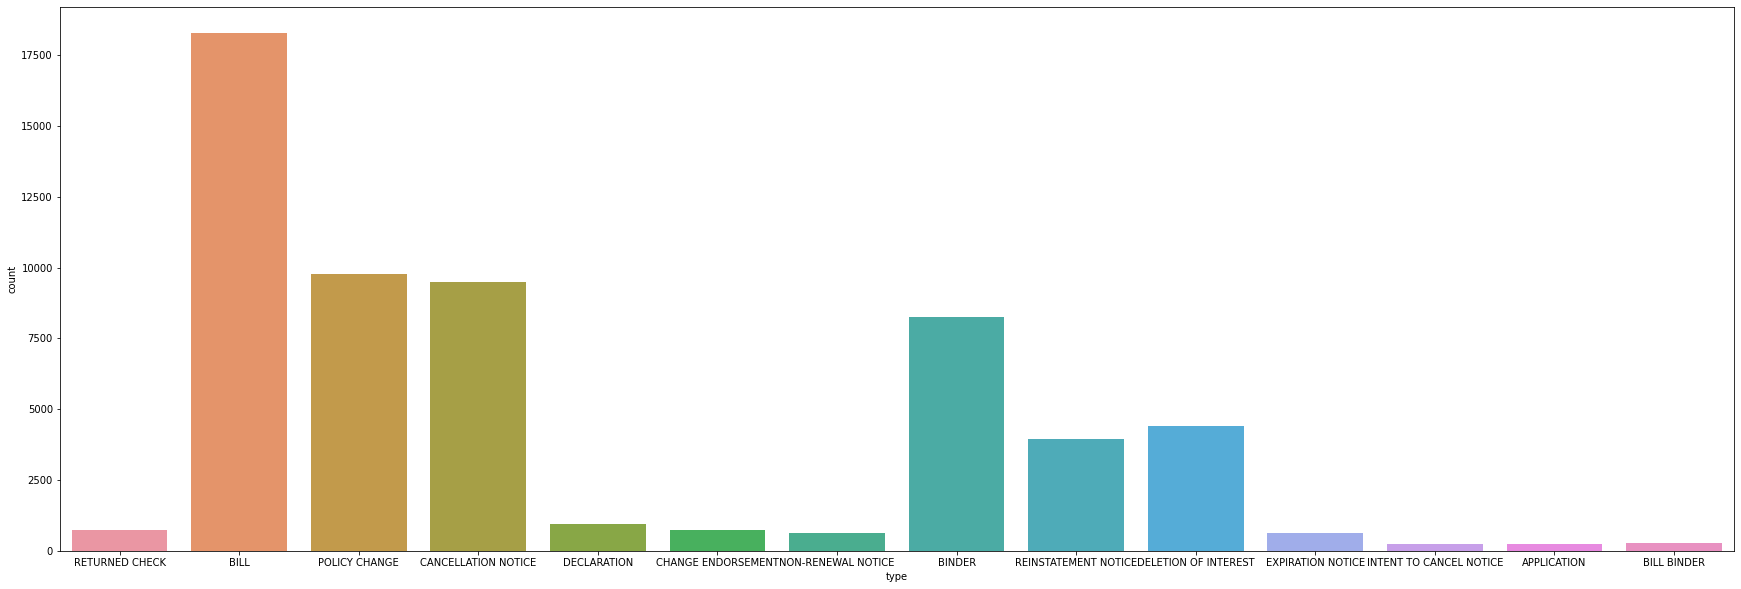

In [23]:
#Lets look at categories again
plt.figure(figsize=[30,10])
sns.countplot(x=df.type)

We have almost twice the amount of Bill then any other cateogry, lets downsample the bill type

In [24]:
#Use the downsampling function to reduce the bill to 10000
df=sample_class(df[df['type']=='BILL']
             ,df[df['type']!='BILL']
             ,10000
             ,'down_sample_majority_class'
             ,random_state=123)

<AxesSubplot:xlabel='type', ylabel='count'>

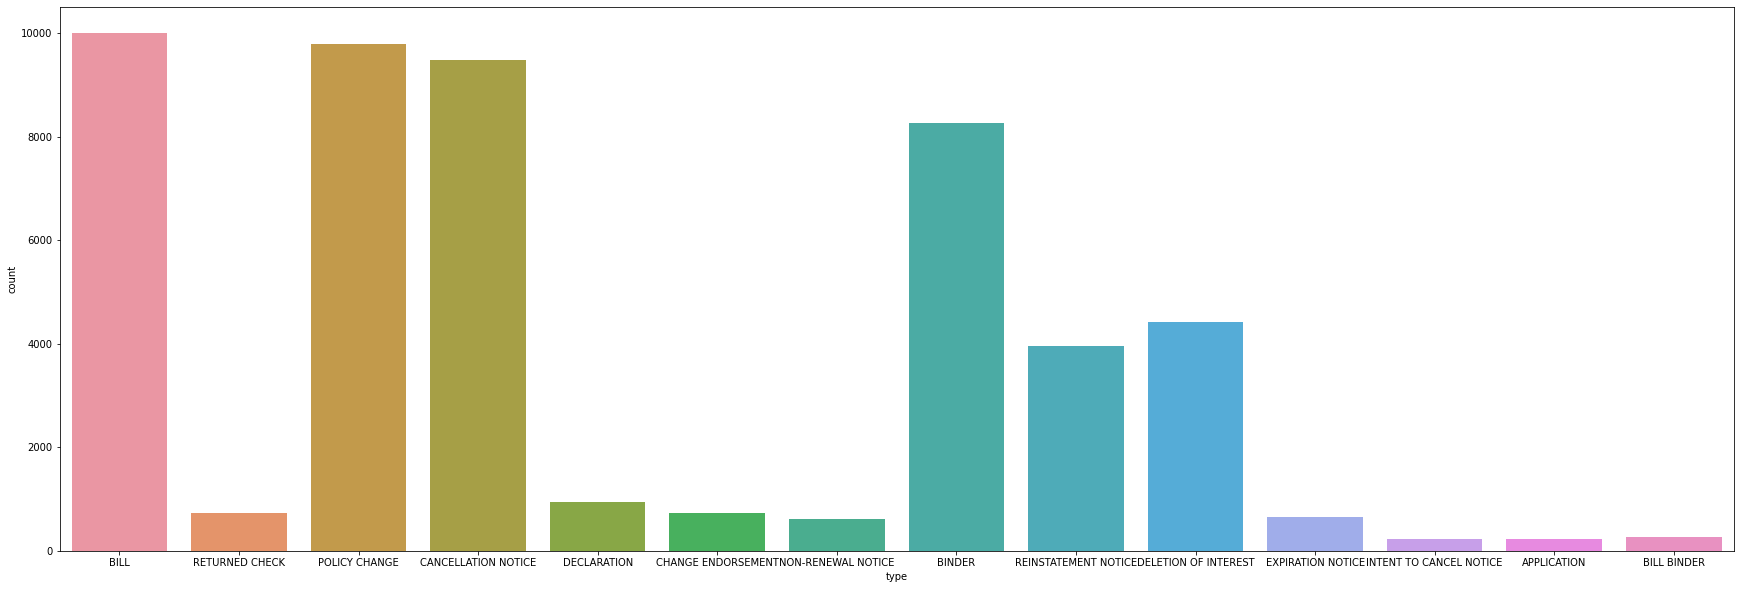

In [25]:
#Lets look at Dist again
plt.figure(figsize=[30,10])
sns.countplot(x=df.type)

In [26]:
#df['breakpoint']=df.text.str.find(' ',24000)
#df['new_text'] = df.apply(lambda x: x['text'][:2001], axis=1)
#df.apply(lambda x: x['text'][:2001], axis=1)

In [27]:
#Export the data to csv to do some modeling on it
df.to_csv('data_preprocessed.csv',index=False)

The data is still quite unbalanced, some ways to fix this can be combining certain document types
togeather which are similar
like bill-bill binder etc